### Importar as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento do caminho e arquivo
path = 'C:\\Users\\FIC\\Documents\\david_python\\'
file = 'IceCreamData.csv'

# Atribuir o arquivo a um dataframe
iceCream = pd.read_csv(path + file)

# Verificar o cabeçalho
iceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


### Visualizar o cabeçalho e o final do dataframe

In [2]:
# Visualizar as primeiras linhas do DataFrame
iceCream.head(2)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122


In [3]:
# Visualizar as últimas linhas do DataFrame
iceCream.tail(2)

,Temperature,Revenue
498,22.362402,566.217304
499,28.957736,655.660388


### Descrever os dados numéricos do dataframe

In [4]:
iceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


#### Obter informações do Dataframe

In [5]:
iceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Passo 03 - Visualizar os dados do Dataset

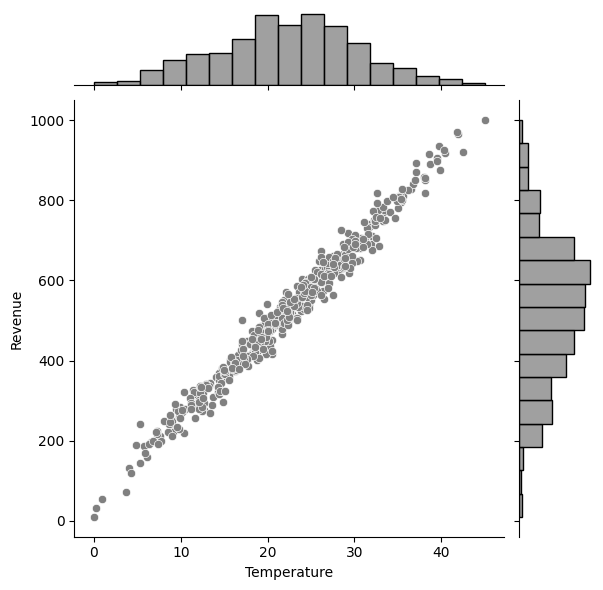

In [6]:
# Gráfico de dispersão e histograma

sns.jointplot(x = 'Temperature', y= 'Revenue', data = iceCream, color = 'gray')

### Pairplot

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


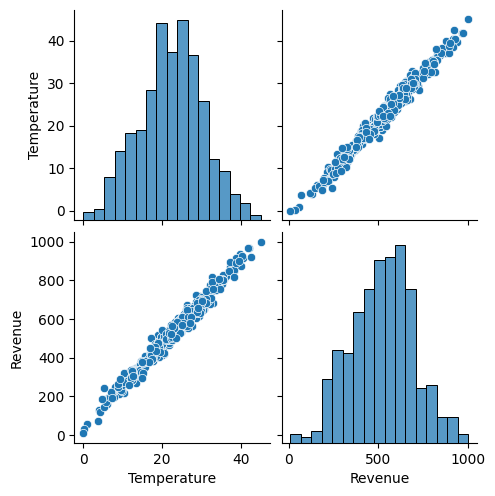

In [7]:
sns.pairplot(iceCream)

# Gráfico de dispersão

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


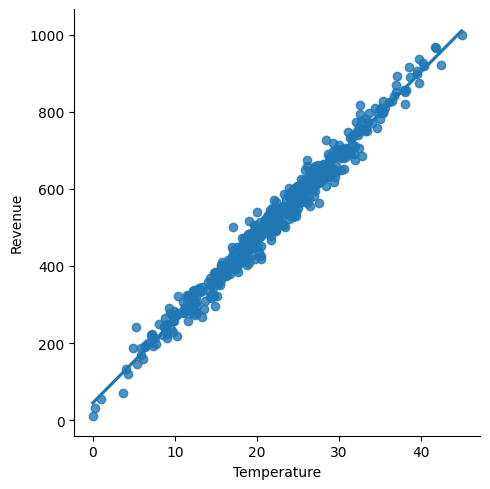

In [12]:
sns.lmplot(
    x = 'Temperature',
    y = 'Revenue',
    data = iceCream
           )

### Passo 4 - Dividir o dataset para criar as bases de treino

In [13]:
x = iceCream[['Temperature']]
y = iceCream['Revenue']

### Passo 5 - Modelo treino

Importar a biblioteca Scikit Learn e dividir as bases em treino e teste, sendo que o tamanho do teste será de 25%

In [15]:
# Importar o comando train_test_split para dividir o dataframe

from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)



In [17]:
X_train.shape

(375, 1)

In [18]:
X_test.shape

(125, 1)

### Importar o algoritimo LinearRegression da biblioteca ScikitLearn

In [19]:
from sklearn.linear_model import LinearRegression

In [23]:
# Este comando irá gerar a linha de tendência
# Calcular os coeficientes linear e angular
regressor = LinearRegression(fit_intercept= True)
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Coeficiente angular (a): ', regressor.coef_)
print('Coficiente linear (b):', regressor.intercept_)


Coeficiente angular (a):  [21.46930201]
Coficiente linear (b): 43.60593647882422


### Passo 06: Executar o teste

In [24]:
y_previsao = regressor.predict(X_test)

y_previsao

array([ 330.52841209,  656.51129997,  580.09199746,  363.43353533,
        385.3258996 ,  797.61107396,  588.50621003,  663.10675671,
        232.41348227,  585.51577006,  654.11917402,  685.95261433,
        589.41886705,  399.04832752,  446.73136367,  659.80230888,
        368.18306535,  956.37933165,  549.79010137,  519.07190586,
        797.06670113,  336.11463322,  449.10011406,  681.33401292,
        569.01197345,  538.91595616,  747.90708711,  313.86487979,
        671.60712129,  122.2838344 ,  629.31133501,  650.58099119,
        459.31932598,  636.13862822,  189.06488699,  446.69976945,
        721.60625845,  254.27368724,  609.04407023,  622.34789292,
        634.91261407,  407.61318223,  723.52723605,  492.24176529,
        473.34373789,  364.17494332,  819.00330225,  576.44725239,
        418.35607294,  356.01030603,  352.42216928,  427.2881066 ,
        478.68160214,  539.28196267,  503.57623789,  558.35245126,
        453.96272118,  455.88029955, 1009.72452694,  757.15262

### Plotando os resultados

Text(0.5, 1.0, 'Receita gerada Vs. Temperatura (Vendas de Sorvete)')

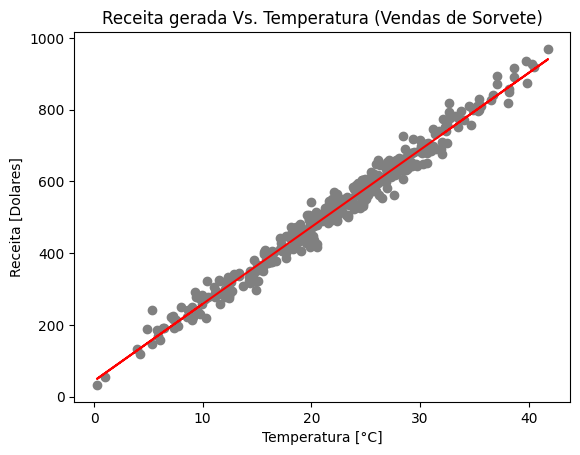

In [26]:
# Criar um gráfico de dispersão

plt.scatter(X_train,y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Receita [Dolares]')
plt.xlabel('Temperatura [°C]')
plt.title('Receita gerada Vs. Temperatura (Vendas de Sorvete)')